Read-in ReaSCAN and Manipulate

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), '..'))
from ReaSCAN_dataset import *

# Init of the vocab.
intransitive_verbs = ["walk"]
transitive_verbs = ["push", "pull"]
adverbs = ["while zigzagging", "while spinning", "cautiously", "hesitantly"]
nouns = ["circle", "cylinder", "square", "box"]
color_adjectives = ["red", "blue", "green", "yellow"]
size_adjectives = ["big", "small"]
relative_pronouns = ["that is"]
relation_clauses = ["in the same row as", 
                    "in the same column as", 
                    "in the same color as", 
                    "in the same shape as", 
                    "in the same size as",
                    "inside of"]
vocabulary = ReaSCANVocabulary.initialize(intransitive_verbs=intransitive_verbs,
                                   transitive_verbs=transitive_verbs, adverbs=adverbs, nouns=nouns,
                                   color_adjectives=color_adjectives,
                                   size_adjectives=size_adjectives, 
                                   relative_pronouns=relative_pronouns, 
                                   relation_clauses=relation_clauses)
min_object_size = 1
max_object_size = 4
object_vocabulary = ObjectVocabulary(shapes=vocabulary.get_semantic_shapes(),
                                     colors=vocabulary.get_semantic_colors(),
                                     min_size=min_object_size, max_size=max_object_size)

In [2]:
# Read-in info.
path_to_data = "../../../data-files/ReaSCAN-Simple/data-compositional-splits.txt"
ReaSCAN_data_json = json.load(open(path_to_data, "r"))

command: walk,to,the,big,yellow,cylinder,cautiously


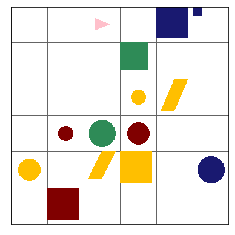

action: ['walk', 'walk', 'turn right', 'walk', 'walk']


In [3]:
example = ReaSCAN_data_json["examples"]["train"][random.randint(0, len(ReaSCAN_data_json["examples"]["train"])-1)]
command = example["command"]
print(f"command: {command}")
situation = example["situation"]
world = World(grid_size=6, colors=vocabulary.get_semantic_colors(),
              object_vocabulary=object_vocabulary,
              shapes=vocabulary.get_semantic_shapes(),
              save_directory="./tmp/")
world.clear_situation()
for obj_idx, obj in situation["placed_objects"].items():
    world.place_object(
        Object(size=int(obj["object"]["size"]), color=obj["object"]["color"], shape=obj["object"]["shape"]), 
        position=Position(row=int(obj["position"]["row"]), column=int(obj["position"]["column"]))
    )
world.place_agent_at(
    Position(
        row=int(situation["agent_position"]["row"]), 
        column=int(situation["agent_position"]["column"])
))
_ = world.render_simple()

# HERE: you can change to other target object.
target_position = Position(
    row=int(situation['target_object']['position']["row"]), 
    column=int(situation['target_object']['position']["column"])
)
world.go_to_position(position=target_position, manner='', primitive_command="walk")
target_commands, target_demonstration = world.get_current_observations()
print(f"action: {target_commands}")

Prepare very simple ReaSCAN/gSCAN split

In [22]:
path_to_data = "../../../data-files/gSCAN-Simple/data-compositional-splits.txt"
ReaSCAN_data_json = json.load(open(path_to_data, "r"))

In [23]:
all_train = ReaSCAN_data_json["examples"]["train"]
all_dev = ReaSCAN_data_json["examples"]["dev"]
all_test = ReaSCAN_data_json["examples"]["test"]
situational_1_test = ReaSCAN_data_json["examples"]["situational_1"]

In [24]:
all_train[0]

{'command': 'walk,to,a,yellow,small,cylinder',
 'meaning': 'walk,to,a,yellow,small,cylinder',
 'derivation': "NP -> NN,NP -> JJ NP,NP -> JJ NP,DP -> 'a' NP,VP -> VV_intrans 'to' DP,ROOT -> VP;T:walk,NT:VV_intransitive -> walk,T:to,T:a,T:yellow,NT:JJ -> small:JJ -> yellow,T:small,T:cylinder,NT:NN -> cylinder",
 'situation': {'grid_size': 6,
  'agent_position': {'row': '1', 'column': '2'},
  'agent_direction': 0,
  'target_object': {'vector': '10000101000',
   'position': {'row': '2', 'column': '2'},
   'object': {'shape': 'cylinder', 'color': 'yellow', 'size': '1'}},
  'distance_to_target': '1',
  'direction_to_target': 's',
  'placed_objects': {'0': {'vector': '10000101000',
    'position': {'row': '2', 'column': '2'},
    'object': {'shape': 'cylinder', 'color': 'yellow', 'size': '1'}},
   '1': {'vector': '01000101000',
    'position': {'row': '3', 'column': '2'},
    'object': {'shape': 'cylinder', 'color': 'yellow', 'size': '2'}},
   '2': {'vector': '10001000010',
    'position': {'

In [25]:
# we need to avoid examples with adverb, because we don't allow them.
select_train = []
select_dev = []
select_test = []
select_situational_1_test = []
for example in all_train:
    if example["manner"] == "" and example["verb_in_command"] == "walk":
        select_train += [example]
for example in all_dev:
    if example["manner"] == "" and example["verb_in_command"] == "walk":
        select_dev += [example]
for example in all_test:
    if example["manner"] == "" and example["verb_in_command"] == "walk":
        select_test += [example]
for example in situational_1_test:
    if example["manner"] == "" and example["verb_in_command"] == "walk":
        select_situational_1_test += [example]

In [30]:
ReaSCAN_data_json["examples"] = {
    "train":select_train,
    "test":select_test,
    "dev":select_dev,
    "situational_1":select_situational_1_test
}

In [ ]:
# dump to the disk.
with open("../../../data-files/gSCAN-Simple/data-compositional-splits.txt", "w") as fd:
    json.dump(ReaSCAN_data_json, fd, indent=4)

In [1]:
import torch

In [2]:
a = torch.rand(3,3)

In [3]:
a

tensor([[0.2145, 0.3951, 0.4269],
        [0.5654, 0.8510, 0.0725],
        [0.2132, 0.4830, 0.2361]])

In [4]:
b = torch.rand(3,3)

In [5]:
b


tensor([[0.2950, 0.9072, 0.8376],
        [0.4900, 0.7411, 0.8824],
        [0.5466, 0.2683, 0.3414]])

In [6]:
a[1,1] = b[1,1]

In [7]:
a



tensor([[0.2145, 0.3951, 0.4269],
        [0.5654, 0.7411, 0.0725],
        [0.2132, 0.4830, 0.2361]])